<img src="Images/PU.png" width="100%">

## Course Name : ML 501 Practical Machine Learning  
#### Notebook compiled by : Bhushan Garware, Project Lead at Learning and Development  
** Important ! ** For internal circulation olny

## Wine Quality Estimation  
Vinho verde wine is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer).
<img src="Images/wine.jpg" width="50%">

Source: [http://archive.ics.uci.edu/ml/datasets/Wine+Quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)

Attributes:
    
<pre>
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 

Output variable (based on sensory data): 
12 - quality (score between 0 i.e very bad and 10 i.e excellent)


</pre>

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset 

In [2]:
import pandas as pd

df = pd.read_csv('./Datasets/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Visualizing the important characteristics of a dataset

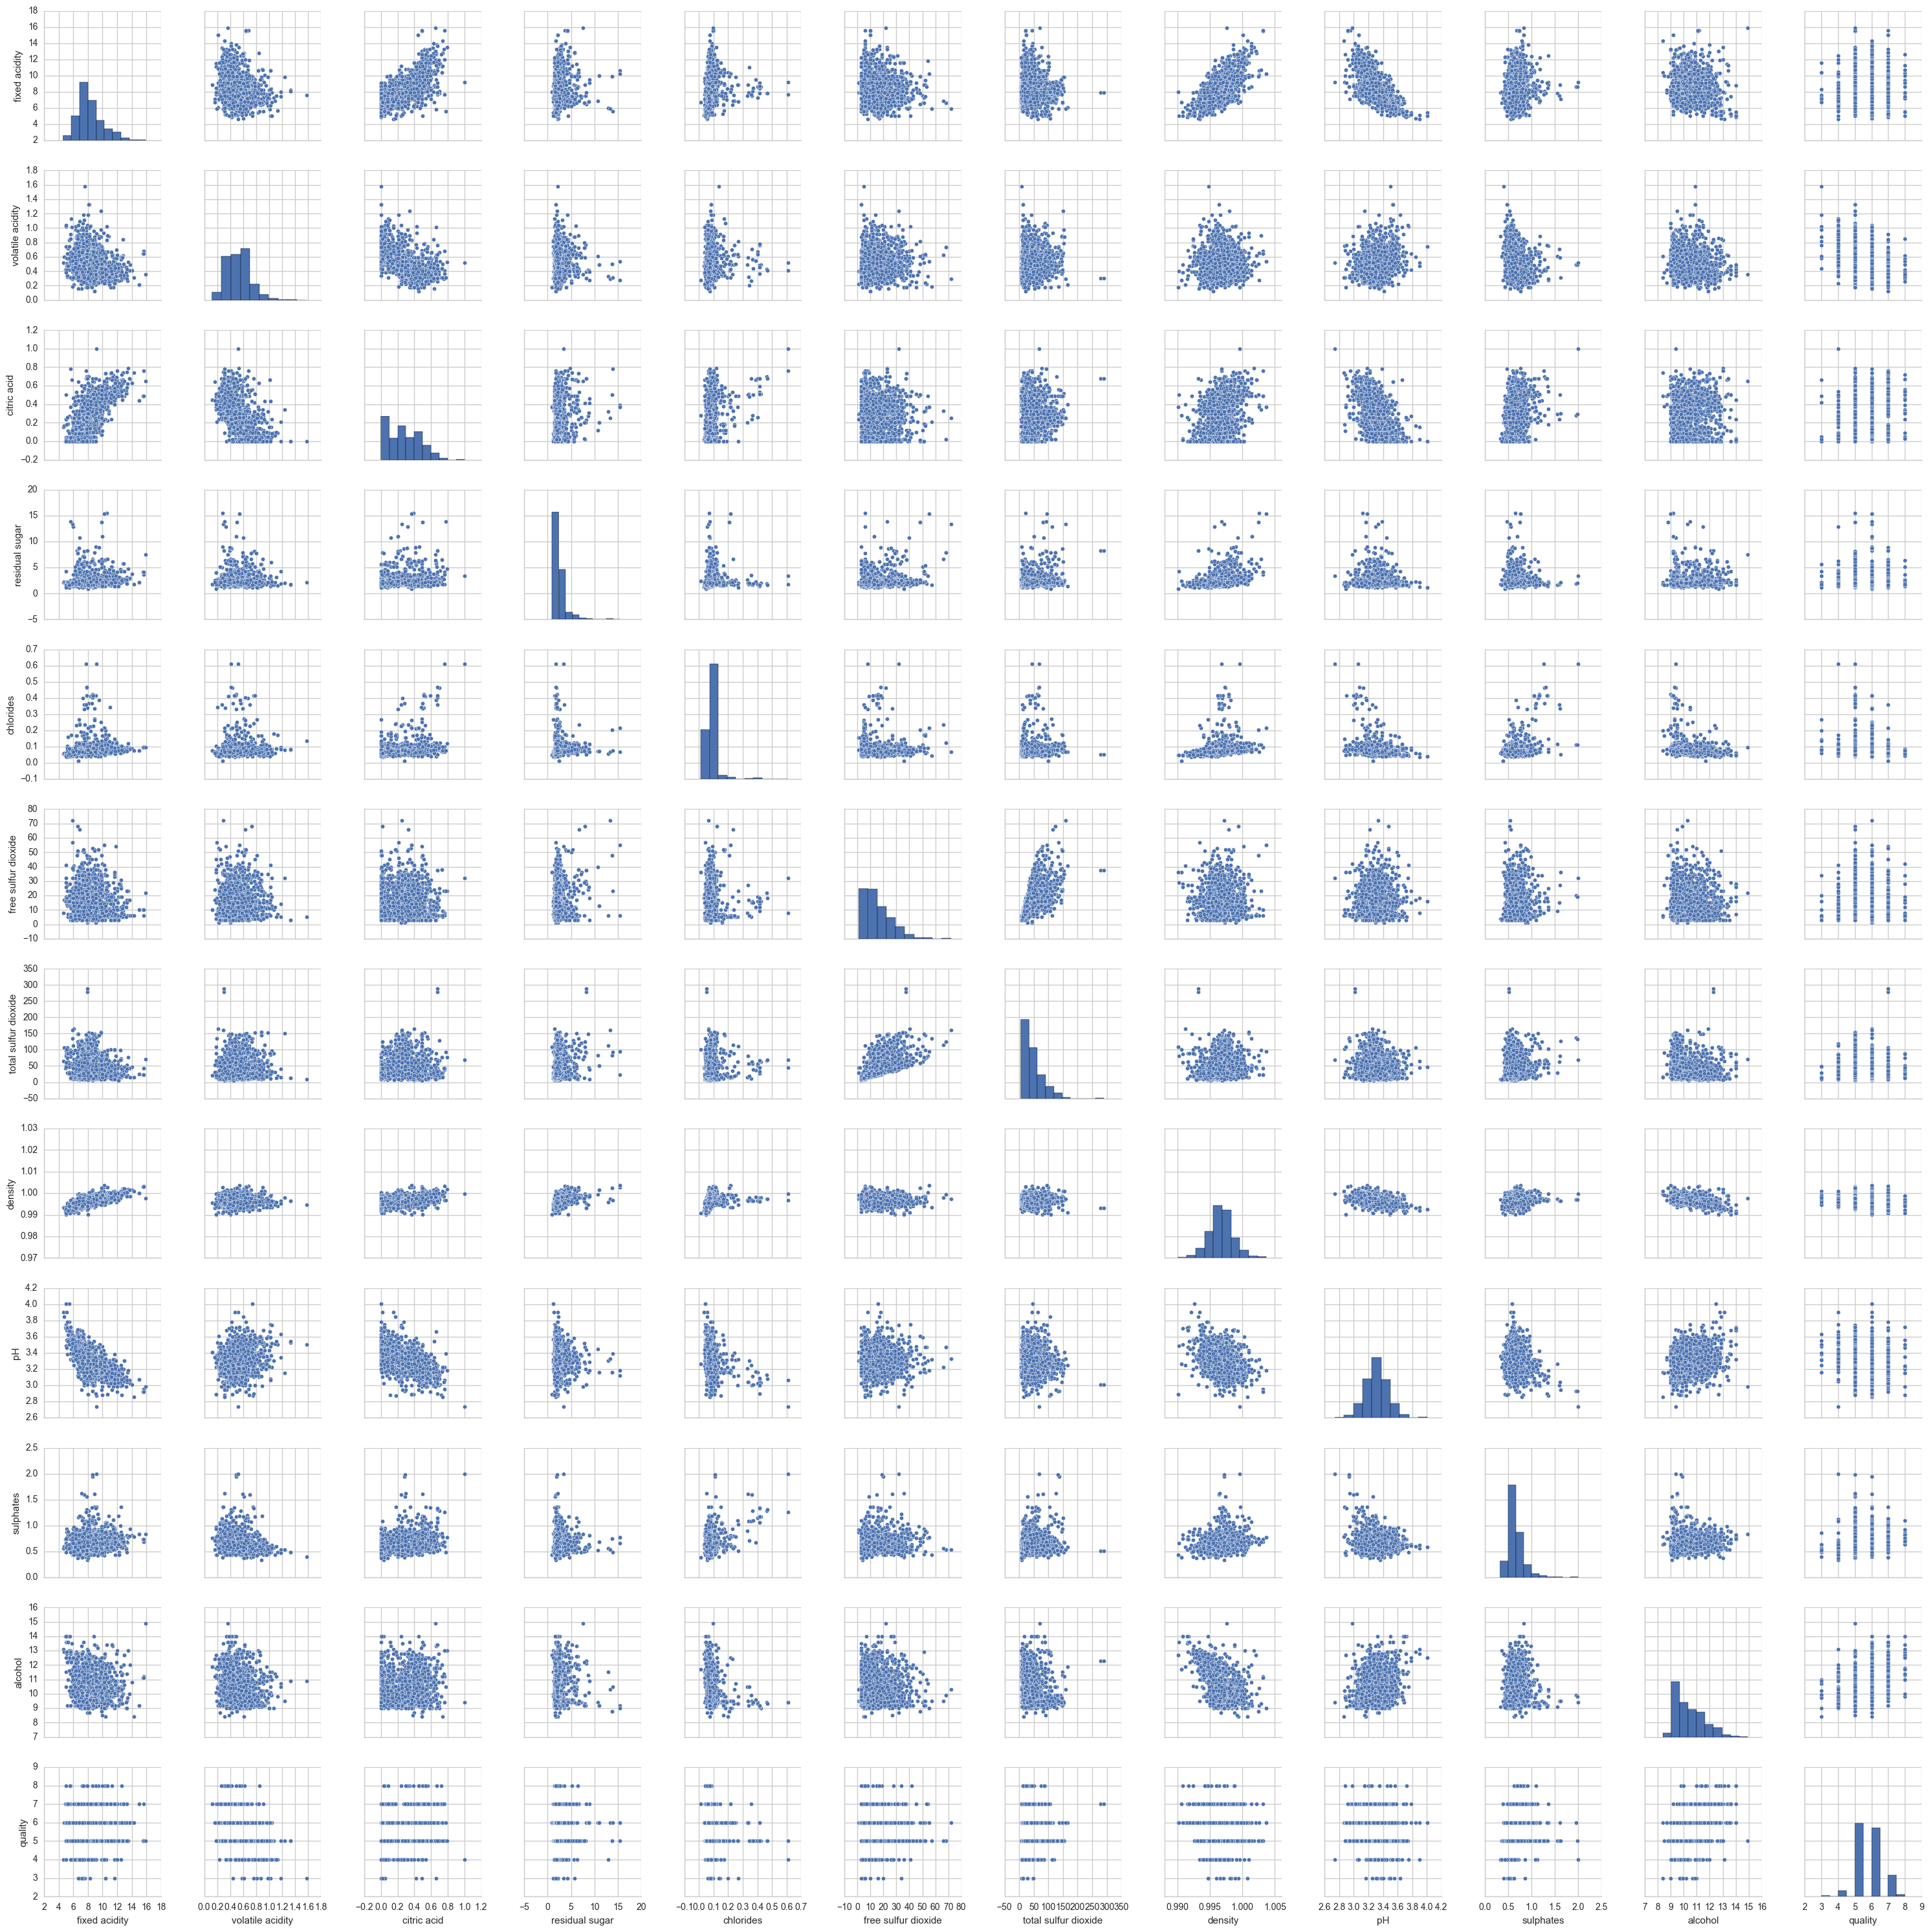

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


sns.set(style='whitegrid', context='notebook')
cols = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

## Introducing Correlation Matrix
The correlation matrix is a square matrix that contains the Pearson product-moment
correlation coefficients (often abbreviated as Pearson's r), which measure the linear
dependence between pairs of features. The correlation coefficients are bounded
to the range -1 and 1. Two features have a perfect positive correlation if $r=1$, no
correlation if $r=0$ and a perfect negative correlation if $r=-1$ respectively. As
mentioned previously, Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  




\begin{equation}
r=\frac{\sum_{i=1}^n[(X^{(i)}-\mu_{x}) (y^{(i)}-\mu_{y})]}{\sqrt{\sum_{i=1}^n(X^{(i)}-\mu_{x})^2}\sqrt{\sum_{i=1}^n(y^{(i)}-\mu_{y})^2}}  = \frac{\sigma_{xy}}{\sigma_{x}\sigma{y}}
\end{equation}

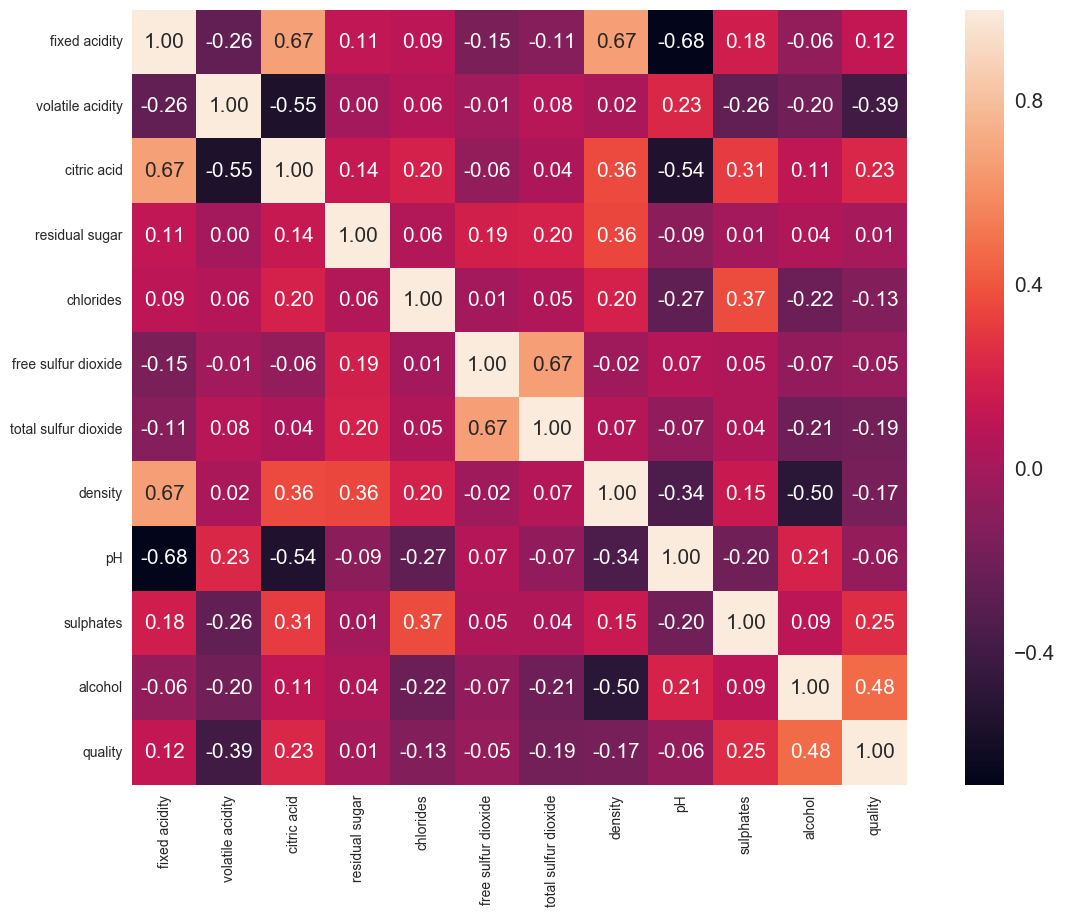

In [4]:
import numpy as np

f, ax = plt.subplots(figsize=(15, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

# 1. Simple Linear Regression with One Variable 

In [7]:
from sklearn.linear_model import LinearRegression
X = df[['alcohol']].values
y = df['quality'].values

In [8]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

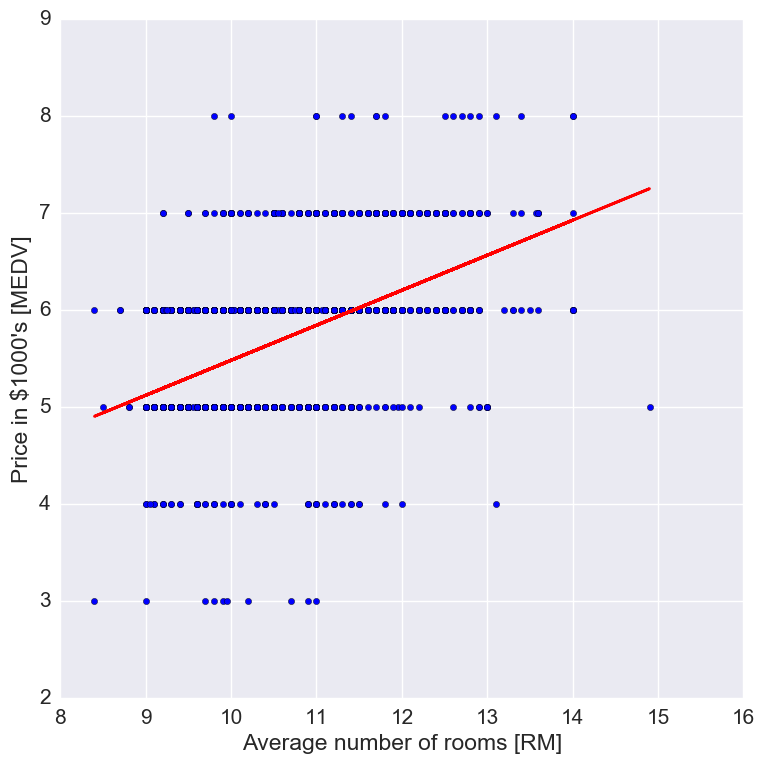

In [9]:
plt.subplots(figsize=(8,8))
plt.scatter(X, y, c='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)    
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print ('Residual sum of squares Train: %.2f' % np.mean((model.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((model.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 0.53
Residual sum of squares Test: 0.44


## Evaluating the performance of linear regression models

Then how to evaluate the performace of the model ?



\begin{equation}
  SS_{res}=\sum_{i=1}^{n} \left({y_{i}-f(X_{i})}\right)^{2} 
\end{equation}




# 2. Multiple Linear Regression

In [14]:
X = df[['alcohol','citric acid']].values
y = df['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model= LinearRegression()
model.fit(X_train, y_train)


print ('Residual sum of squares Train: %.2f' % np.mean((model.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((model.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 0.50
Residual sum of squares Test: 0.44


# 3. Polynomial Regression with One Variable 

# 4. Polynomial Regression with Multiple Variable